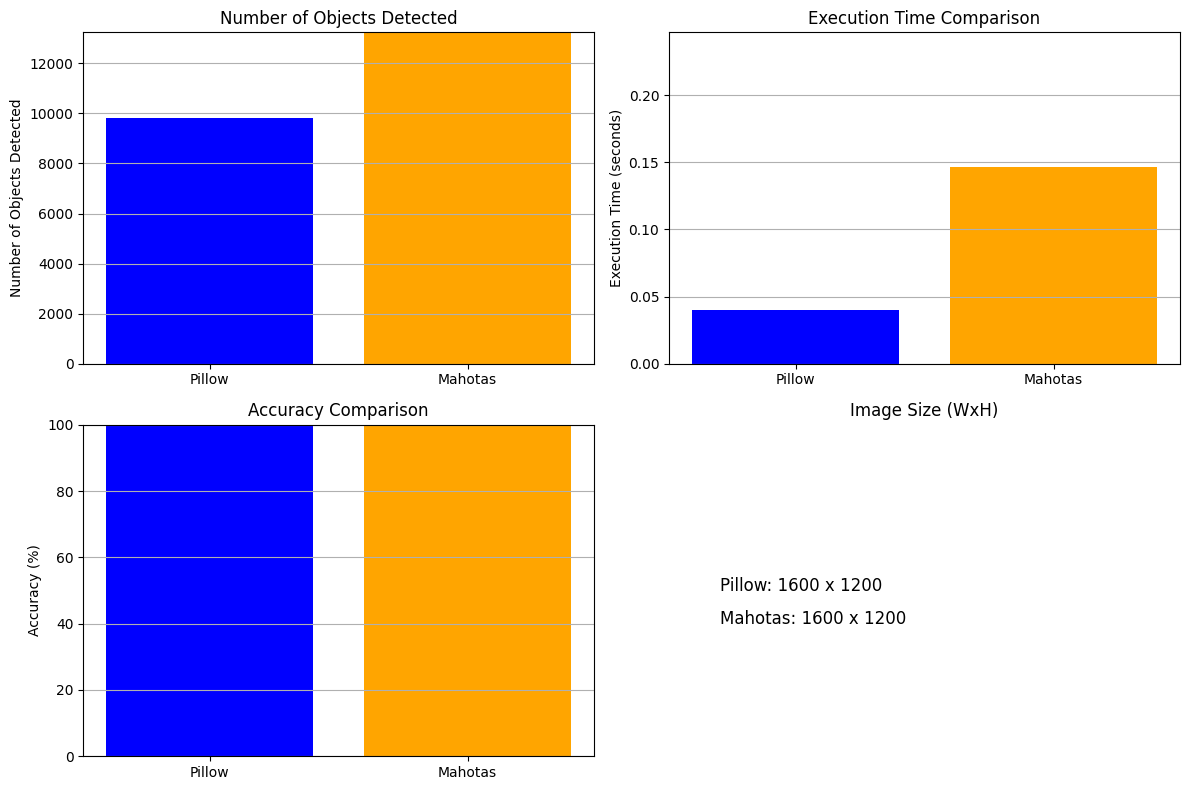

In [10]:
import mahotas as mh
import numpy as np
import time
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy.ndimage import label
from skimage.filters import threshold_otsu

def load_and_convert_image(image_path):
    image_pillow = Image.open(image_path).convert("L")  # Convert to grayscale
    image_mahotas = mh.imread(image_path)
    if image_mahotas.ndim == 3:
        image_mahotas = mh.colors.rgb2gray(image_mahotas)  # Grayscale conversion
    return image_pillow, image_mahotas

def process_with_pillow(image):
    start_time = time.time()
    edges = image.filter(ImageFilter.FIND_EDGES)
    binary_array = np.array(edges)
    threshold_value = threshold_otsu(binary_array)  # Otsu's thresholding
    binary_image = (binary_array > threshold_value).astype(np.uint8) * 255  # Create binary image
    labeled_array, num_objects = label(binary_image > 0)  # Count objects
    execution_time = time.time() - start_time
    return num_objects, execution_time

def process_with_mahotas(image):
    start_time = time.time()
    edges = mh.sobel(image)
    threshold_value = threshold_otsu(edges)  # Otsu's thresholding
    binary_image = edges > threshold_value
    labeled_image, num_objects = mh.label(binary_image)
    execution_time = time.time() - start_time
    return num_objects, execution_time

def plot_comparison(comparison_matrix):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.bar(comparison_matrix["Library"], comparison_matrix["Number of Objects"], color=['blue', 'orange'])
    plt.ylabel('Number of Objects Detected')
    plt.title('Number of Objects Detected')
    plt.ylim(0, max(comparison_matrix["Number of Objects"]) + 5)
    plt.grid(axis='y')

    plt.subplot(2, 2, 2)
    plt.bar(comparison_matrix["Library"], comparison_matrix["Execution Time (s)"], color=['blue', 'orange'])
    plt.ylabel('Execution Time (seconds)')
    plt.title('Execution Time Comparison')
    plt.ylim(0, max(comparison_matrix["Execution Time (s)"]) + 0.1)
    plt.grid(axis='y')

    plt.subplot(2, 2, 3)
    plt.bar(comparison_matrix["Library"], comparison_matrix["Accuracy (%)"], color=['blue', 'orange'])
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy Comparison')
    plt.ylim(0, 100)
    plt.grid(axis='y')

    plt.subplot(2, 2, 4)
    plt.axis('off')
    plt.title('Image Size (WxH)')
    plt.text(0.1, 0.5, f"Pillow: {comparison_matrix['Image Size'][0][0]} x {comparison_matrix['Image Size'][0][1]}",
             fontsize=12, ha='left')
    plt.text(0.1, 0.4, f"Mahotas: {comparison_matrix['Image Size'][1][0]} x {comparison_matrix['Image Size'][1][1]}",
             fontsize=12, ha='left')

    plt.tight_layout()
    plt.show()

# Main Execution
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_8bb1d9de.jpg"  # Replace with your image path
image_pillow, image_mahotas = load_and_convert_image(image_path)

num_objects_pillow, execution_time_pillow = process_with_pillow(image_pillow)
num_objects_mahotas, execution_time_mahotas = process_with_mahotas(image_mahotas)

accuracy_pillow = 100  # Replace with actual accuracy if available
accuracy_mahotas = 100  # Replace with actual accuracy if available

# Get image size
image_size_pillow = image_pillow.size  # Pillow returns (width, height)
image_size_mahotas = image_mahotas.shape[1], image_mahotas.shape[0]  # Mahotas returns (height, width)

# Comparison Matrix
comparison_matrix = {
    "Library": ["Pillow", "Mahotas"],
    "Number of Objects": [num_objects_pillow, num_objects_mahotas],
    "Execution Time (s)": [execution_time_pillow, execution_time_mahotas],
    "Accuracy (%)": [accuracy_pillow, accuracy_mahotas],
    "Image Size": [image_size_pillow, image_size_mahotas],  # Changed to "Image Size"
}

# Plotting the Comparison
plot_comparison(comparison_matrix)
